In [1]:
# draw chart I_sc - d 
# d(cm)
# for get a linear chart we should insert distance in a upper power d^n

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


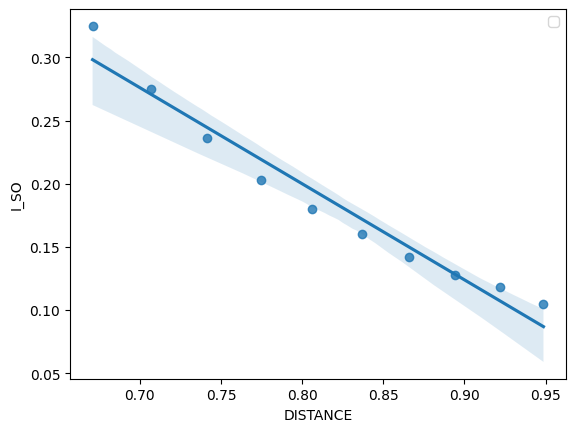

y = 0.809 + -0.761x


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy



# create set of data
I_SO = np.array([0.105, 0.118, 0.128, 0.142, 0.160, 0.180, 0.203, 0.236, 0.275, 0.325]) # IN MILLI AMPER UNIT

DISTANCE = np.array([0.9, 0.85, 0.80, 0.75,0.70, 0.65, 0.60, 0.55, 0.50, 0.45])**0.5 # IN METER UNIT

df = pd.DataFrame({'DISTANCE':DISTANCE, 'I_SO':I_SO})

# plt.plot(DISTANCE**0.5, I_SO, marker = 'o', label='I, d^0.5')

#create regplot
p = sns.regplot(data=df, x=df.DISTANCE, y=df.I_SO)

#calculate slope and intercept of regression equation we use slop and intercept in equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#add regression equation to plot
equation = 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x'


plt.legend()
plt.show()

print(equation)